<a href="https://colab.research.google.com/github/chanu0073/Heart-Disease-Detection-Research-ML-Project/blob/main/Heart_Disease_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/heart_disease_uci.csv')

In [ ]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
data.shape

(920, 16)

In [ ]:
data['dataset'].value_counts()

,count
dataset,
Cleveland,304
Hungary,293
VA Long Beach,200
Switzerland,123


In [ ]:
data['num'].value_counts()

,count
num,
0,411
1,265
2,109
3,107
4,28


In [ ]:
data.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


Distribution plot of thal

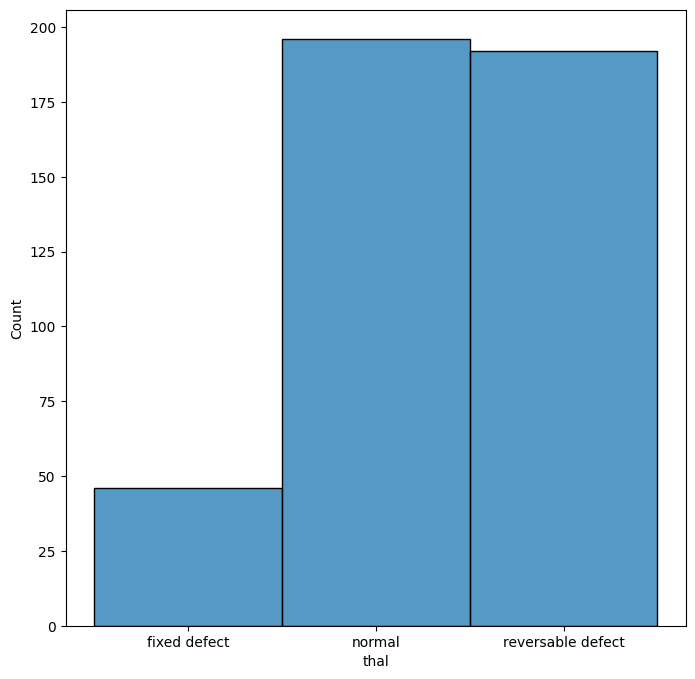

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.histplot(data['thal'],ax=ax)
plt.show()

In [ ]:
data['thal'].value_counts()

,count
thal,
normal,196
reversable defect,192
fixed defect,46


In [ ]:
data['thal'].fillna(data['thal'].mode()[0],inplace=True)

<ipython-input-83-7a3b1d2dbee4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['thal'].fillna(data['thal'].mode()[0],inplace=True)


In [ ]:
data['thal'].value_counts()

,count
thal,
normal,682
reversable defect,192
fixed defect,46


In [ ]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
data['ca'].value_counts()

,count
ca,
0.0,181
1.0,67
2.0,41
3.0,20


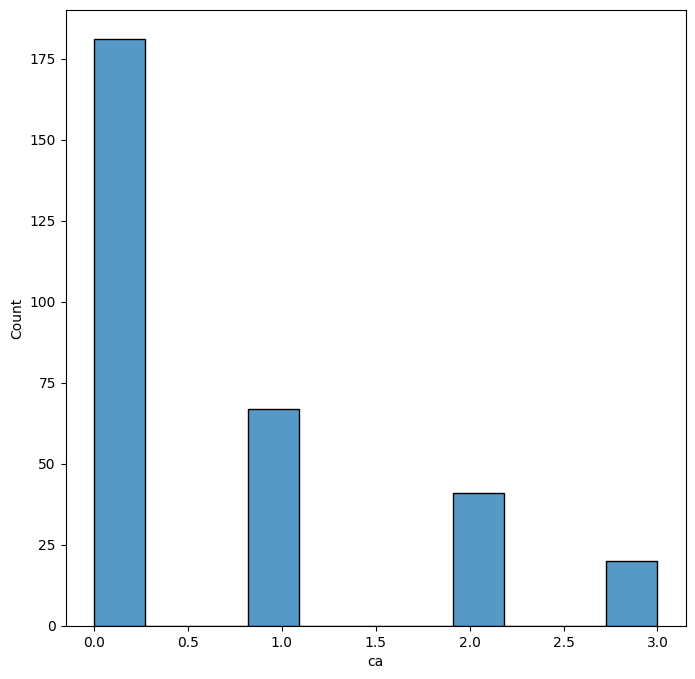

In [ ]:
fig,ax = plt.subplots(figsize=(8,8))
sns.histplot(data['ca'],ax=ax)
plt.show()

In [ ]:
data['ca'].fillna(data['ca'].mode()[0],inplace=True)

<ipython-input-88-8fa6c9c81012>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ca'].fillna(data['ca'].mode()[0],inplace=True)


In [ ]:
data['ca'].value_counts()

,count
ca,
0.0,792
1.0,67
2.0,41
3.0,20


In [ ]:
data.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [ ]:
data['slope'].value_counts()

,count
slope,
flat,345
upsloping,203
downsloping,63


In [ ]:
data['slope'].fillna(data['slope'].mode()[0],inplace=True)

<ipython-input-93-9656af72a803>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['slope'].fillna(data['slope'].mode()[0],inplace=True)


In [ ]:
data['slope'].value_counts()

,count
slope,
flat,654
upsloping,203
downsloping,63


In [ ]:
data['oldpeak'].value_counts()

,count
oldpeak,
0.0,370
1.0,83
2.0,76
1.5,48
3.0,28
0.5,19
1.2,17
2.5,16
0.8,15


<ipython-input-96-4a9e3ca294a1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['oldpeak'],ax=ax)


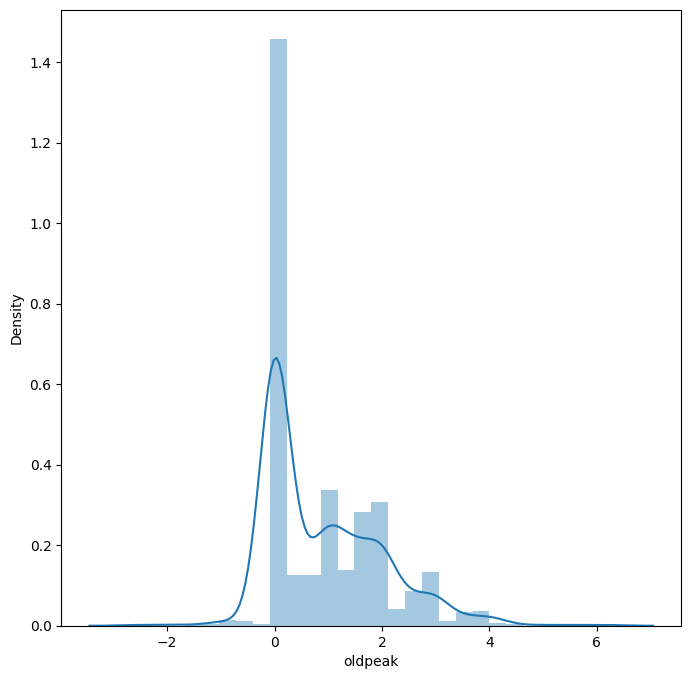

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(data['oldpeak'],ax=ax)
plt.show()

In [ ]:
data['oldpeak'] = data['oldpeak'].apply(lambda x: x if x>=0 else np.nan)

In [ ]:
data['oldpeak']

,oldpeak
0,2.3
1,1.5
2,2.6
3,3.5
4,1.4
...,...
915,0.0
916,NaN
917,0.0
918,NaN


In [ ]:
data['oldpeak'].value_counts()

,count
oldpeak,
0.0,370
1.0,83
2.0,76
1.5,48
3.0,28
0.5,19
1.2,17
2.5,16
0.8,15


In [ ]:
data.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [ ]:
data['oldpeak'].fillna(data['oldpeak'].median,inplace=True)

<ipython-input-101-7c9a421ade57>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method Series.median of 0      2.3
1      1.5
2      2.6
3      3.5
4      1.4
      ... 
915    0.0
916    NaN
917    0.0
918    NaN
919    0.0
Name: oldpeak, Length: 920, dtype: float64>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data['oldpeak'].fillna(data['oldpeak'].median,inplace=True)


In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(data['oldpeak'],ax=ax)
plt.show()